<a href="https://colab.research.google.com/github/aveerdram/Regression/blob/main/%D0%91%D1%80%D0%B8%D0%BB%D0%BB%D0%B8%D0%B0%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.read_csv('diamonds.csv')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53148,53149,0.80,Very Good,E,SI2,62.4,55.0,2623.0,5.88,5.92,3.68
53149,53150,0.74,Ideal,F,SI2,61.9,56.0,2623.0,5.81,5.85,3.61
53150,53151,0.70,Ideal,I,SI1,61.6,56.0,2623.0,5.69,5.71,3.51
53151,53152,0.70,Ideal,I,SI1,60.4,57.0,2623.0,5.75,5.79,3.49


In [ ]:
train = pd.read_csv('diamonds.csv')
train = train.drop(columns='Unnamed: 0')

train.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
train.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
train.isnull().sum() # пропуски

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
train.duplicated().all() # дубликаты

False

In [ ]:
sns.set()
sns.set_style('darkgrid')

<ipython-input-7-c604dc1d4b66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()) # тепловая карта


<Axes: >

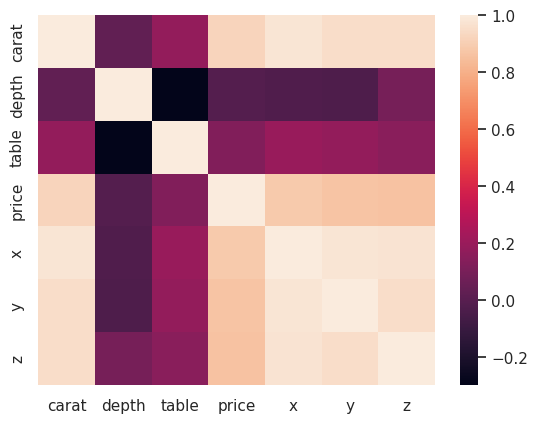

In [ ]:
sns.heatmap(train.corr()) # тепловая карта

*Посмотрим распределения признаков*

<Axes: >

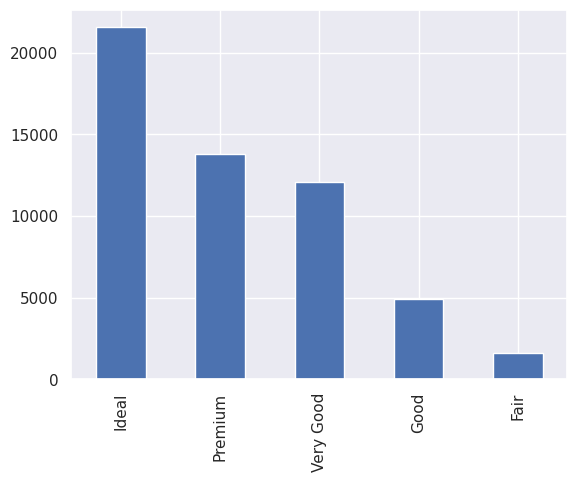

In [ ]:
train['cut'].value_counts().plot.bar()

<Axes: >

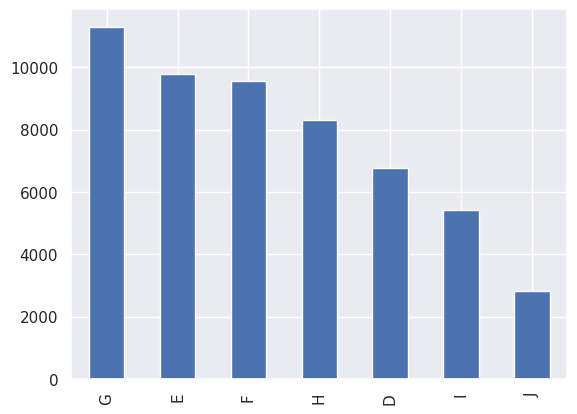

In [ ]:
train['color'].value_counts().plot.bar()

<Axes: >

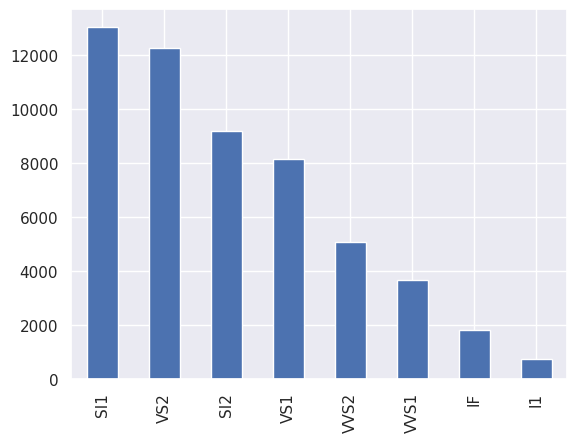

In [ ]:
train['clarity'].value_counts().plot.bar()

<ipython-input-11-1ff4757ce83f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train, x='depth', palette='bright')


<Axes: xlabel='depth', ylabel='Density'>

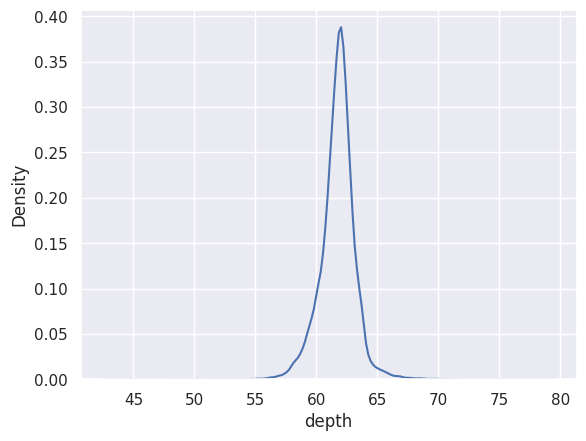

In [ ]:
sns.kdeplot(data=train, x='depth', palette='bright')

<ipython-input-12-09b12cd6b03a>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train, x='carat', palette='bright')


<Axes: xlabel='carat', ylabel='Density'>

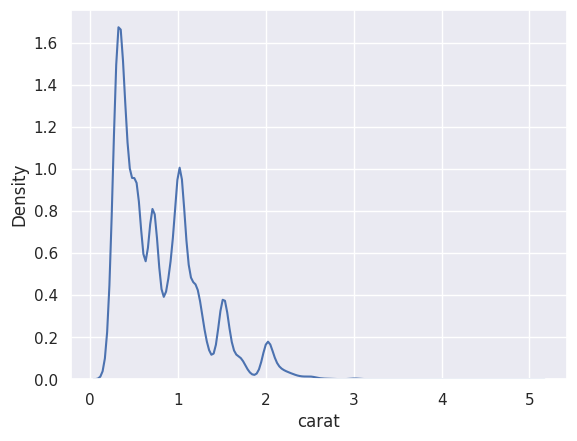

In [ ]:
sns.kdeplot(data=train, x='carat', palette='bright')

<ipython-input-13-e73cefa3a075>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train, x='table', palette='bright')


<Axes: xlabel='table', ylabel='Density'>

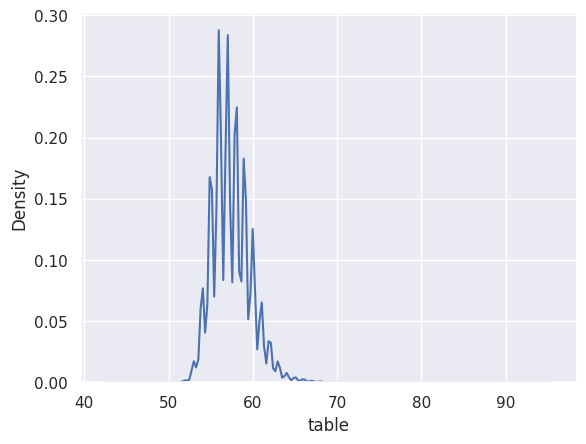

In [ ]:
sns.kdeplot(data=train, x='table', palette='bright')

<ipython-input-14-a1f915c495bf>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train, x='price', palette='bright')


<Axes: xlabel='price', ylabel='Density'>

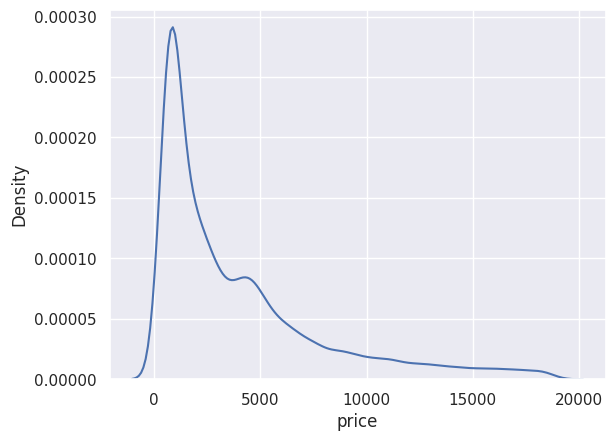

In [ ]:
sns.kdeplot(data=train, x='price', palette='bright')

*Посмотрим зависимости признаков*

<ipython-input-15-88dcf61fc849>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train, x='depth', y='price', palette='bright')


<Axes: xlabel='depth', ylabel='price'>

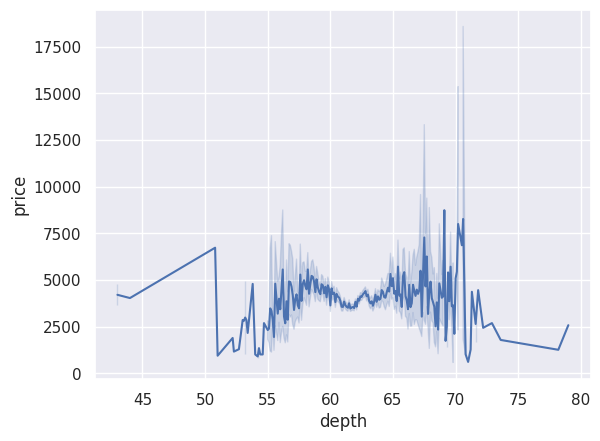

In [ ]:
sns.lineplot(data=train, x='depth', y='price', palette='bright')

<ipython-input-16-a0ea3cec9ebb>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train, x='x', y='price', palette='bright')


<Axes: xlabel='x', ylabel='price'>

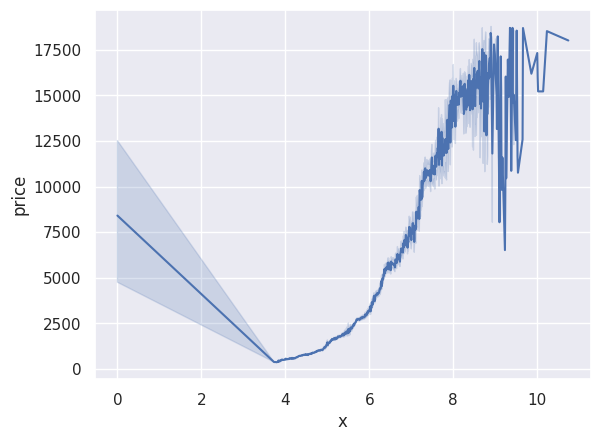

In [ ]:
sns.lineplot(data=train, x='x', y='price', palette='bright')

<ipython-input-17-0d5557dab3b1>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train, x='x', y='carat', palette='bright')


<Axes: xlabel='x', ylabel='carat'>

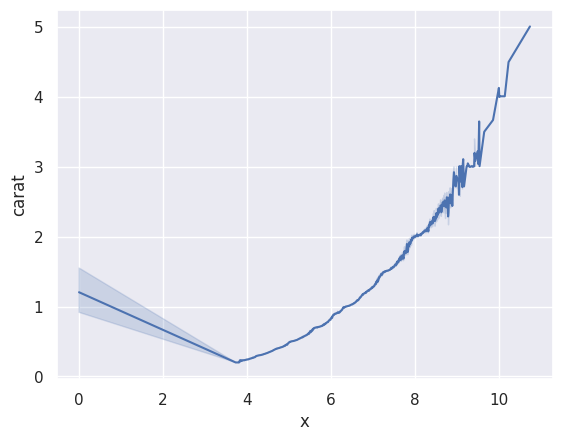

In [ ]:
sns.lineplot(data=train, x='x', y='carat', palette='bright')

<ipython-input-18-d775cfa45f11>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train, x='carat', y='price', palette='bright')


<Axes: xlabel='carat', ylabel='price'>

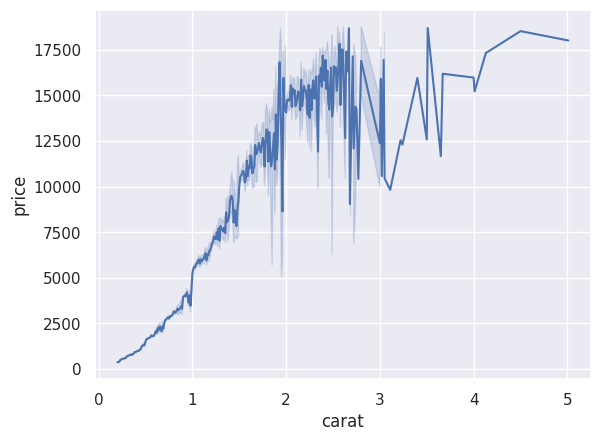

In [ ]:
sns.lineplot(data=train, x='carat', y='price', palette='bright')

*Посмотрим выбросы и аномалии*

<Axes: xlabel='carat'>

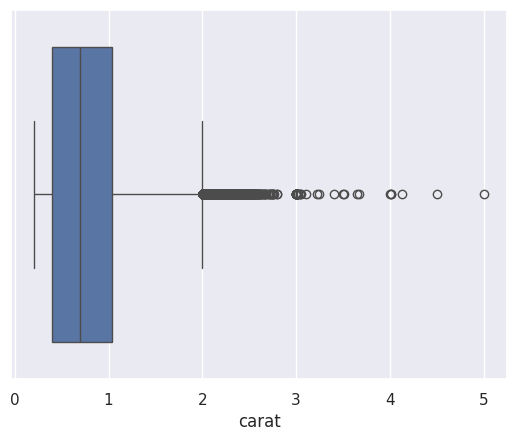

In [ ]:
sns.boxplot(x=train['carat'])

In [ ]:
train[train.carat > 4] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


<Axes: xlabel='depth'>

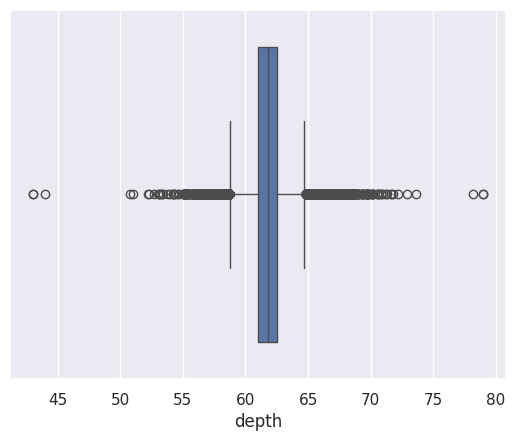

In [ ]:
sns.boxplot(x=train['depth'])

In [ ]:
train[train.depth > 75] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
41918,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [ ]:
train[train.depth < 50] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12


<Axes: xlabel='table'>

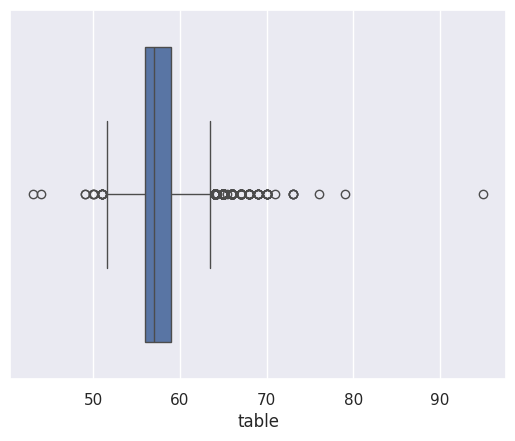

In [ ]:
sns.boxplot(x=train['table'])

In [ ]:
train[train.table > 90] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [ ]:
train[train.table < 50] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
5979,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
11368,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
22701,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
35633,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65


<Axes: xlabel='price'>

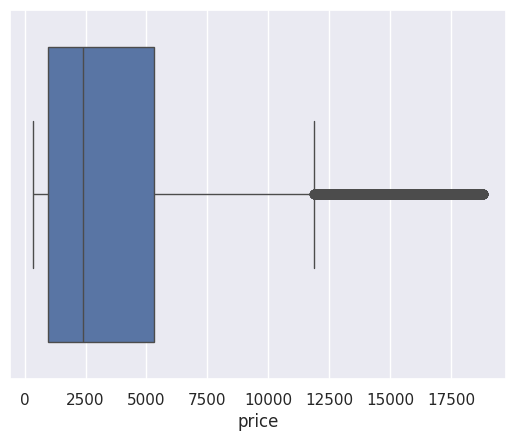

In [ ]:
sns.boxplot(x=train['price'])

<Axes: xlabel='x'>

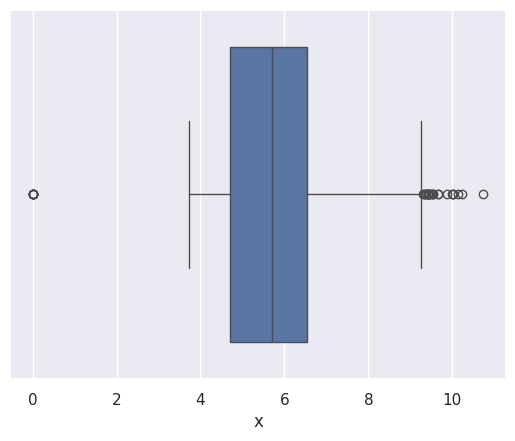

In [ ]:
sns.boxplot(x=train['x'])

In [ ]:
train[train.x > 10] # это норм

,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [ ]:
train[train.x < 2] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


<Axes: xlabel='y'>

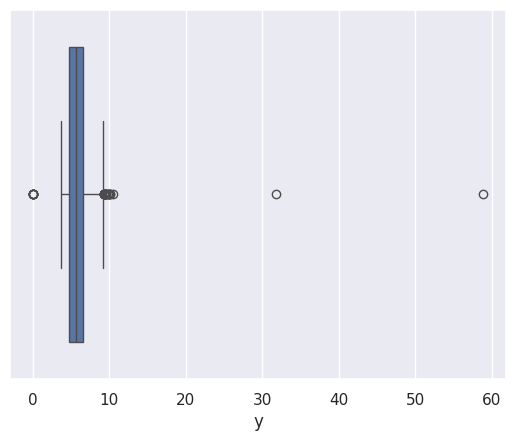

In [ ]:
sns.boxplot(x=train['y'])

In [ ]:
train[train.y > 20] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [ ]:
train[train.y < 3] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


<Axes: xlabel='z'>

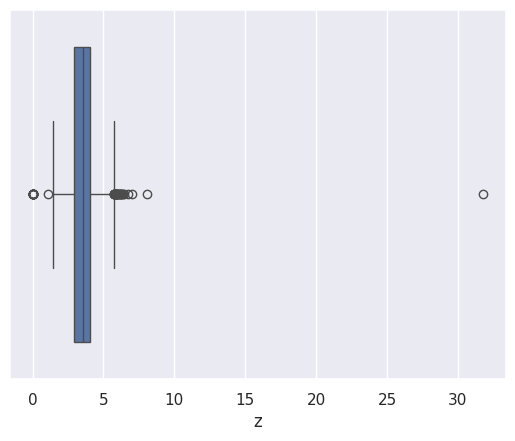

In [ ]:
sns.boxplot(x=train['z'])

In [ ]:
train[train.z > 30] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [ ]:
train[train.z < 1] # надо что-то делать

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


*Удалили несколько самых больших выбросов, оставили те, которые влияют на регрессию*

In [ ]:
train = train.drop(train[train.z == 0].index)

In [ ]:
train = train.drop(train[train.z > 30].index)

In [ ]:
train = train.drop(train[train.y > 30].index)

In [ ]:
train = train.drop(train[train.table > train.quantile(q=0.75).table].index)

<ipython-input-40-f143679d80d9>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.drop(train[train.table > train.quantile(q=0.75).table].index)


In [ ]:
train = train.drop(train[train.table < train.quantile(q=0.25).table].index)

<ipython-input-41-460fbde95b46>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.drop(train[train.table < train.quantile(q=0.25).table].index)


<Axes: xlabel='z'>

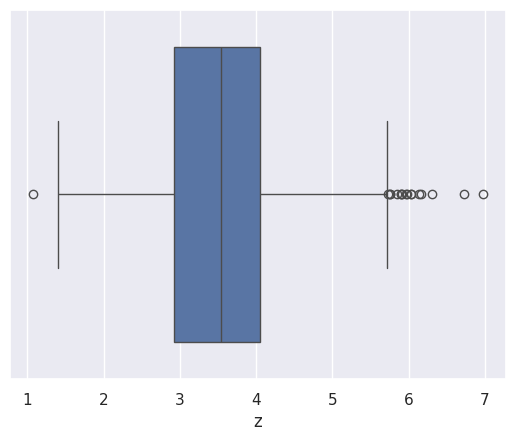

In [ ]:
sns.boxplot(x=train['z'])

*Кодировка категориальных признаков*

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

train0 = train.copy()

enc = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
train0.cut = enc.fit_transform(train[['cut']])

enc = OrdinalEncoder(categories = [['J', 'I', 'H', 'G', 'F', 'E', 'D']])
train0['color'] = enc.fit_transform(train[['color']])

enc = OrdinalEncoder(categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
train0['clarity'] = enc.fit_transform(train[['clarity']])

In [ ]:
train0

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2.0,0.0,5.0,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2.0,1.0,6.0,62.3,57.0,336,3.95,3.98,2.47
11,0.23,4.0,0.0,4.0,62.8,56.0,340,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
53932,0.70,2.0,5.0,3.0,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,2.0,5.0,3.0,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,3.0,6.0,2.0,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50


<ipython-input-45-c52c825650ad>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train0, x='cut', y='color', palette='bright')


<Axes: xlabel='cut', ylabel='color'>

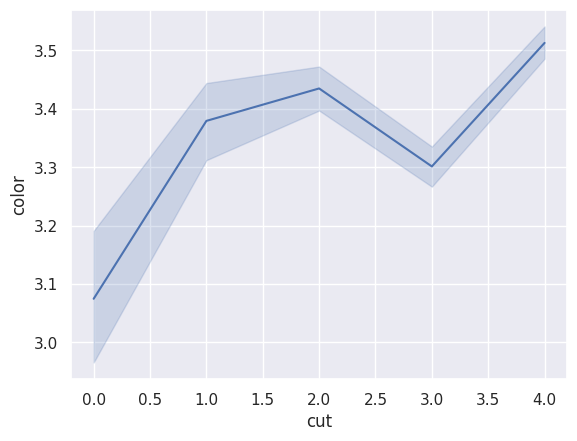

In [ ]:
sns.lineplot(data=train0, x='cut', y='color', palette='bright')

<ipython-input-46-09f395e938a0>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train0, x='color', y='clarity', palette='bright')


<Axes: xlabel='color', ylabel='clarity'>

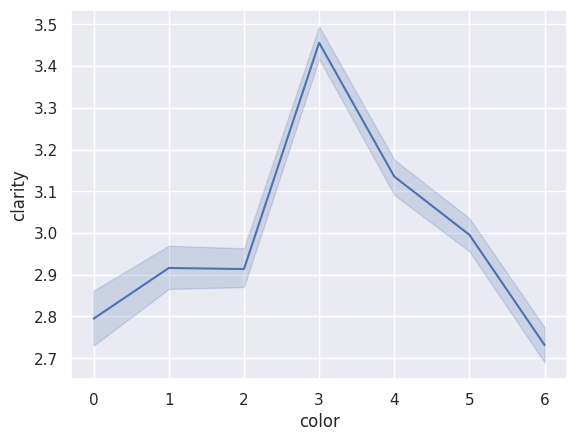

In [ ]:
sns.lineplot(data=train0, x='color', y='clarity', palette='bright')

*Нормализация*

In [ ]:
from sklearn.model_selection import train_test_split

X = train0.drop('depth', axis=1)
y = train0.depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

y_test

17610    62.2
31720    65.2
53915    62.1
2765     62.3
27314    61.6
         ... 
33380    62.1
33308    64.4
34962    62.3
16394    62.0
10919    60.9
Name: depth, Length: 17391, dtype: float64

In [ ]:
from sklearn.preprocessing import normalize

normalize(X_train, norm="l1")
normalize(X_test, norm="l1")

array([[0.00017272, 0.00041787, 0.00027858, ..., 0.00095135, 0.0009611 ,
        0.00059477],
       [0.00035153, 0.        , 0.00703062, ..., 0.00492143, 0.004898  ,
        0.00319893],
       [0.0002716 , 0.00141088, 0.00176361, ..., 0.00205989, 0.00206695,
        0.00128038],
       ...,
       [0.00058413, 0.00730167, 0.00182542, ..., 0.00797707, 0.00803184,
        0.00498339],
       [0.00015842, 0.00030175, 0.00060349, ..., 0.00097766, 0.00098369,
        0.00060802],
       [0.00020707, 0.00080417, 0.00080417, ..., 0.00131884, 0.00130878,
        0.00080015]])

*Постройте линейную регрессию. Оцените результат с помощью метрик r2 и MSE.*

In [ ]:
from sklearn.linear_model import LinearRegression

line_model = LinearRegression()

In [ ]:
line_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = line_model.predict(X_test)

y_pred

array([61.95752171, 63.86624004, 61.93886418, ..., 62.06438365,
       62.17267908, 61.05248934])

In [ ]:
line_model.score(X_train, y_train), line_model.score(X_test, y_test)

(0.8210011400651379, 0.89242114451599)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test, y_pred)

0.89242114451599

In [ ]:
mean_squared_error(y_test, y_pred)

0.18073465415926326

*Постройте полиномиальную регрессию. Сравните результаты с предыдущими.*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
poly_model = LinearRegression()

poly_model.fit(X_poly, y)

LinearRegression()

In [ ]:
y_p = poly_model.predict(X_poly)

In [ ]:
r2_score(y, y_p), mean_squared_error(y, y_p)

(0.9831906282362696, 0.027977872654164126)

Результаты стали получше, так как увеличился коэффициенти детерминации (r2_score) и уменьшилась cреднеквадратическая ошибка.

*Сравните результаты при различных вариантах работы с категориальными признаками: удаление, кодирование OrdinalEncoder, OneHotEncoding. Объясните полученные результаты.*

1. Удаление

In [ ]:
train1 = train.copy()

train1 = train1.drop(columns=['cut', 'clarity', 'color'])

train1

,carat,depth,table,price,x,y,z
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
6,0.24,62.3,57.0,336,3.95,3.98,2.47
11,0.23,62.8,56.0,340,3.93,3.90,2.46
...,...,...,...,...,...,...,...
53932,0.70,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50


In [ ]:
X = train1.drop('depth', axis=1)
y = train1.depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [ ]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = line_model.predict(X_test)

In [ ]:
line_model.score(X_train, y_train), line_model.score(X_test, y_test)

(0.8349230379873539, 0.8717080888878856)

In [ ]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.8717080888878856, 0.21122055568901651)

Результаты стали похуже (относительно Ordinal Encoder), так как уменьшился коэффициент детерминации (r2_score) и увеличилась cреднеквадратическая ошибка.

2. OneHot

In [ ]:
from sklearn.preprocessing import OneHotEncoder

train2 = train.copy()

enc = OneHotEncoder(categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']], sparse_output=False)
train2['clarity'] = enc.fit_transform(train[['clarity']])

enc = OneHotEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']], sparse_output=False)
train2['cut'] = enc.fit_transform(train[['cut']])

enc = OneHotEncoder(categories = [['J', 'I', 'H', 'G', 'F', 'E', 'D']], sparse_output=False)
train2['color'] = enc.fit_transform(train[['color']])

In [ ]:
X = train2.drop('depth', axis=1)
y = train2.depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [ ]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = line_model.predict(X_test)

In [ ]:
line_model.score(X_train, y_train), line_model.score(X_test, y_test)

(0.8637373127796795, 0.8478586861343553)

In [ ]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.8478586861343553, 0.25398188790463355)

Результаты стали ещё хуже (по сравнению с удалением), так как уменьшился коэффициент детерминации (r2_score) и увеличилась cреднеквадратическая ошибка.

Таким образом, OrdinalEncoder подошёл лучше всех, так как категориальные признаки были не только текстовыми, но и порядковыми.

*Используйте SGDRegressor и оцените результат.*

In [ ]:
from sklearn.linear_model import SGDRegressor

X = train0.carat
y = train0.depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [ ]:
sgdr = SGDRegressor()

In [ ]:
sgdr.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [ ]:
y_pred = sgdr.predict(X_test.values.reshape(-1,1))

In [ ]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.005847281195005771, 1.6444391209576383)

*Используйте другой тип регрессии (на ваш выбор) и сравните результаты.*

In [ ]:
X = train0.drop('depth', axis=1)
y = train0.depth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8114157283458897, 0.9019954949515678)